# Introduction
1. Importing the Dataset
2. Data Cleaning
3. Exploratory Data Analysis
    - Number of matches per sessions
    - Most number of winning team
    - Is Toss Winner Also the Match Winner?
    - Top cities where the matches are held
    - Favorite Grounds
    - Top cities where the matches are held
    - Toss Decisions
    - Maximum Toss Winners
    - Maximum Man Of Matches
    - Winning Year
    - Top players of the IPL
    - Most boundries of the player

In [1]:
import numpy 
import pandas as pd

In [2]:
match = pd.read_csv("matches.csv")
match.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
delevires = pd.read_csv("deliveries.csv")
delevires.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [4]:
print(match.shape)
print("**************************")
print(delevires.shape)

(636, 18)
**************************
(150460, 21)


In [5]:
print(match.columns)
print("**************************")
print(delevires.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
**************************
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


# Data Cleaning

In [6]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [8]:
delevires.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [9]:
match.drop("umpire3", axis=1, inplace = True)

In [10]:
match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [12]:
match.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

delevires.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SR','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)


In [77]:
match.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


# Exploratory Data Analysis

    - Number of matches per sessions
    - Most number of winning team
    - Is Toss Winner Also the Match Winner?
    - Top cities where the matches are held
    - Favorite Grounds
    - Top cities where the matches are held
    - Toss Decisions
    - Maximum Toss Winners
    - Maximum Man Of Matches
    - Winning Year
    - Top players of the IPL
    - Most boundries of the player

In [31]:
df = match.iloc[[match['win_by_runs'].idxmax()]]
df[['season', 'team1', 'team2','winner', 'win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [32]:
df = match.iloc[[match['win_by_wickets'].idxmax()]]
df[['season', 'team1', 'team2','winner', 'win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


# 1. Number of matches per sessions

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

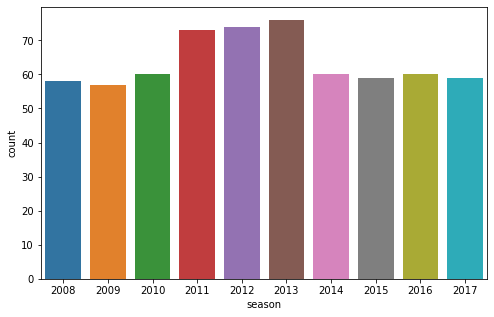

In [38]:
plt.subplots(figsize=(8,5))
sns.countplot(x = 'season', data = match)
plt.show()

2. most number of winning team

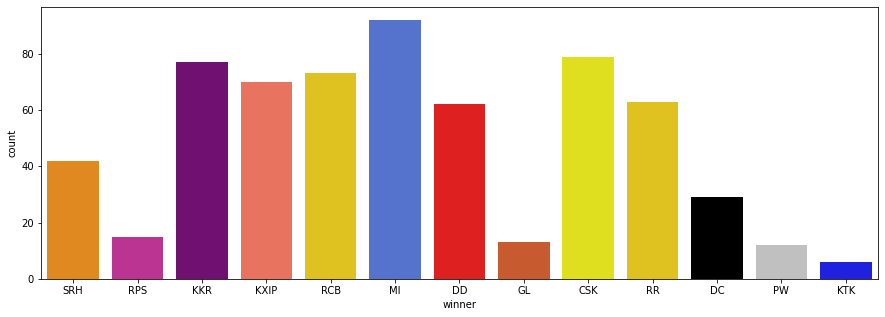

In [40]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'winner', data = match, palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ,'black','silver','b'])
plt.show()

3. Is Toss Winner Also the Match Winner?

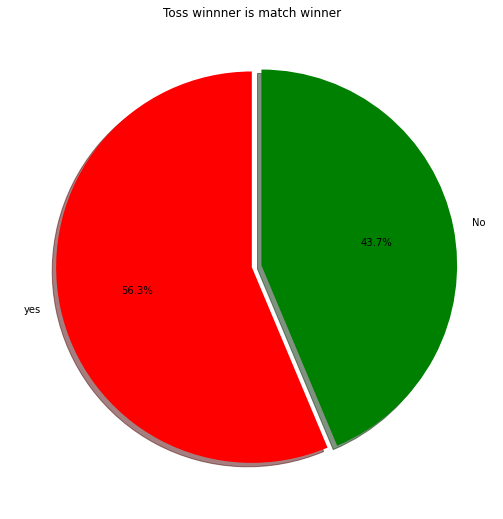

In [49]:
df = match[match['toss_winner'] == match ['winner']]
slices = [len(df), (577 - len(df))]
leables = ['yes', 'No']
plt.pie(slices,labels=leables,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Toss winnner is match winner")
plt.show()

4. Top cities where the matches are held

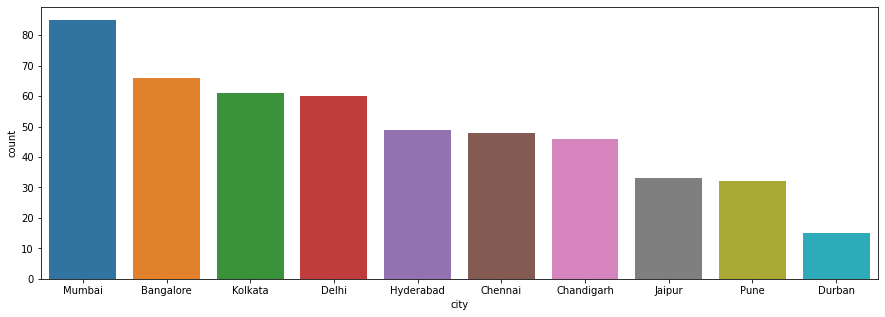

In [65]:
plt.subplots(figsize=(15,5))
fav_city = match['city'].value_counts().reset_index()
fav_city.columns = ['city', 'count']
sns.barplot(y = 'count', x='city', data = fav_city[:10])
plt.show()

5. Favorite Grounds

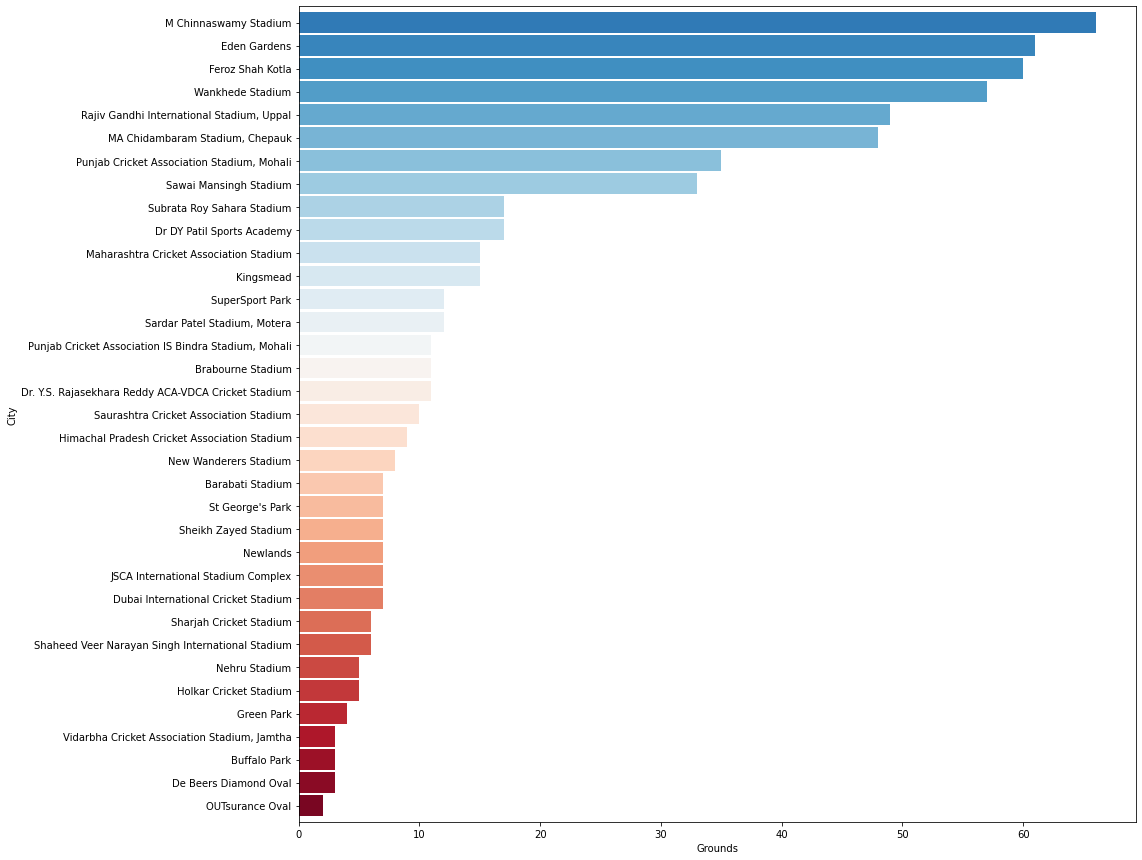

In [70]:
plt.subplots(figsize=(15,15))

ax = match['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('RdBu',40))
ax.set_xlabel("Grounds")
ax.set_ylabel("City")
plt.show()

In [66]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# 5 Toss Decisions

In [79]:
((match['toss_decision'].value_counts())/577*100)

field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64

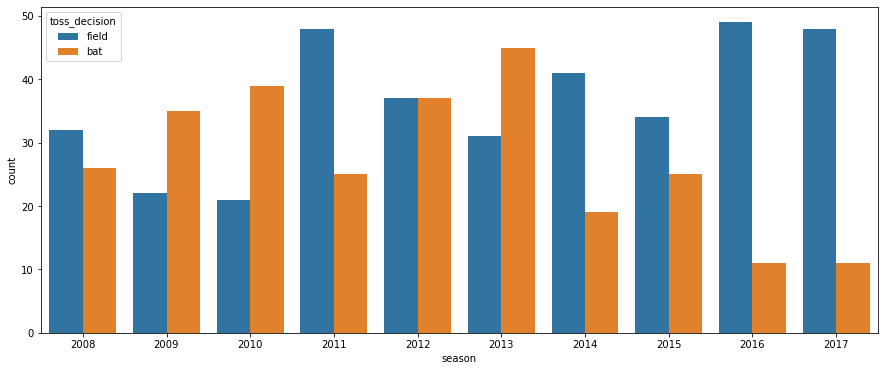

In [84]:
plt.subplots(figsize=(15,6))
sns.countplot(x = 'season', hue = 'toss_decision', data= match )
plt.show()

# 6. maxmimum toss winner

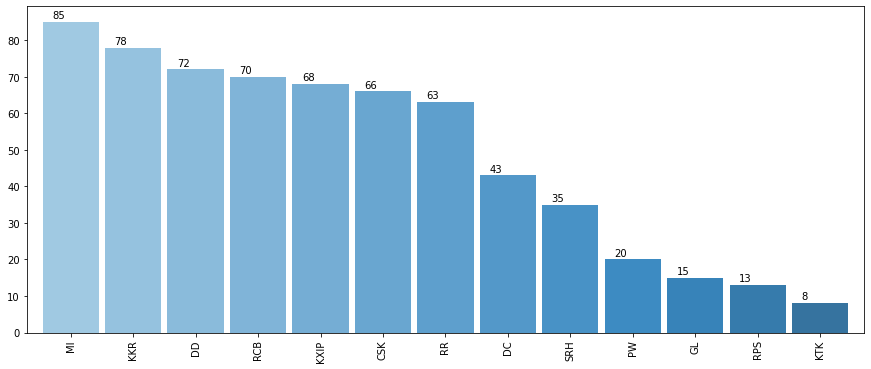

In [99]:
plt.subplots(figsize=(15,6))
ax=match['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues_d',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# 7. Maximum Man Of Matches

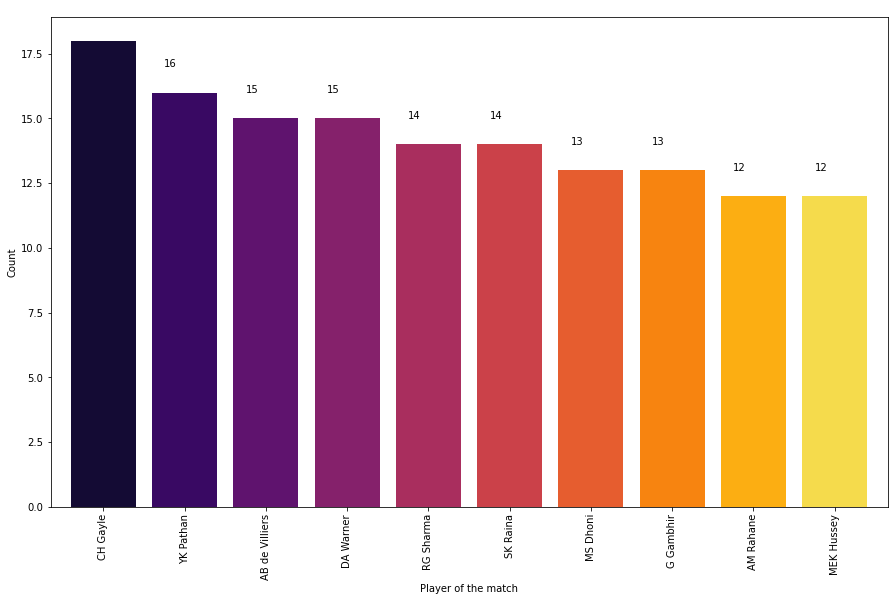

In [107]:
plt.subplots(figsize=(15,9))
ax = match['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.set_xlabel("Player of the match")
ax.set_ylabel("Count")
plt.show()

In [100]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# 8. Winning Year

In [109]:
for i in range(2008, 2017):
    df = (match[match['season'] == i]).iloc[-1]
    print(df[[1, 10]].values)

[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


In [110]:
for i in range(2008, 2018):
    df = (match[match['season'] == i]).iloc[-1]
    print(df[[1, 10]].values)

[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']
[2017 'MI']


# Assignment 

- Favorite Grounds
- Toss Decisions
- Top cities where the matches are held
- Maximum Man Of Matches
- Winning Year
- Top players of the IPL
- Most boundries of the player
- Maximum Toss Winners